# 서포트벡터머신(SVM)



*   SVM은 두 데이터 그룹을 나누는 초평면을 찾으면서 이 폭이 가장 넓은 것을 찾는 방법

*   마진 안에 아무런 데이터도 들어오지 않도록 하는 것이 불가능하거나 어떤 데이터는 잡음에 가까워 무시하는 것이 좋을 수도 있음







https://github.com/dknife/ML/blob/main/data/two_classes.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'two_classes.csv')

In [ ]:
# 데이터프레임의 마지막 5개 행을 출력하세요. Hint: tail()
df.tail(5)

,x1,x2,y
995,2.664896,-33.240534,0
996,-2.019928,5.687221,1
997,-4.634470,5.102681,1
998,1.426275,-47.015037,0
999,1.988053,24.930404,0


In [ ]:
# 데이터프레임의 상위 5개 행을 출력하세요.
df.head(5)

,x1,x2,y
0,2.164064,-17.205938,0
1,1.947562,-32.529402,0
2,-0.860753,-18.513110,1
3,2.530348,0.693982,0
4,1.014954,47.582231,0


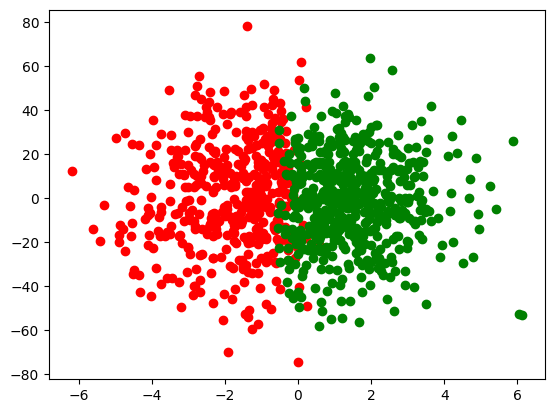

In [ ]:
# y 값이 1인 데이터만 df_positive에 저장하세요.
df_positive = df[df['y']>0]

# y 값이 0인 데이터만 df_negative에 저장하세요.
df_negative = df[df['y']==0]

# df_positive의 x1, x2를 사용하여 산점도를 그리고, 빨간색으로 표시하세요.
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')

# df_negative의 x1, x2를 사용하여 산점도를 그리고, 초록색으로 표시하세요.
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


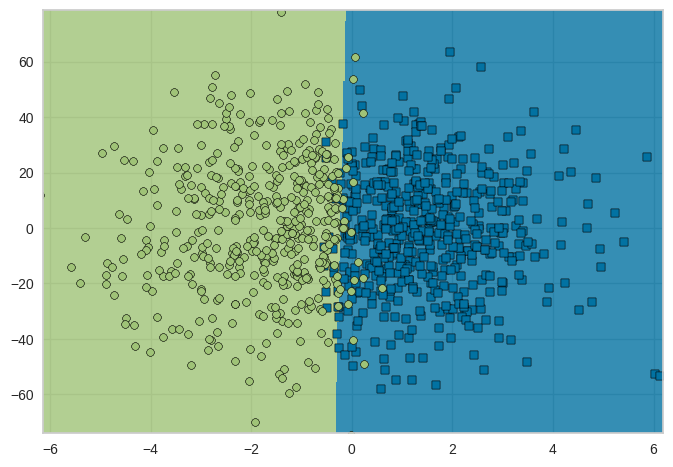

In [ ]:
from sklearn.svm import LinearSVC

# x1, x2 컬럼의 값을 NumPy 배열로 변환하여 X에 저장하세요.
X = df[['x1', 'x2']].to_numpy()

# y 컬럼의 값을 y에 저장하세요. 이는 우리의 목표 변수(레이블)입니다.
y = df['y']

# 선형 SVM 모델을 생성하세요. C는 오차 허용 정도를 결정하는 매개변수, loss는 손실 함수를 결정하는 매개변수입니다.
svm_simple = LinearSVC(C=1, loss='hinge')

# X와 y를 사용하여 SVM 모델을 학습시키세요.
svm_simple.fit(X, y)

# 만들어진 모델을 사용해 새로운 데이터의 결과를 예측하세요.
svm_simple.predict([[0.12, 0.56], [-4, 40],  [0, 40], [5,20]])

# yellowbrick의 DecisionViz 모듈을 사용하여 결정 경계를 시각화하세요.
from yellowbrick.contrib.classifier import DecisionViz

# DecisionViz 클래스를 사용하여 시각화 도구를 생성하고, svm_simple 모델과 제목을 인자로 줍니다.
viz = DecisionViz(svm_simple, title="linear SVM")

# X, y를 사용하여 시각화 도구를 학습시킵니다.
viz.fit(X, y)

# X, y를 사용하여 결정 경계를 그립니다.
viz.draw(X, y)

* 파이프라인을 이용한 데이터 정제
    *  SVM은 데이터의 크기에 민감한 특성을 갖고 있음
    *  데이터 정제를 위해 정규화normalization 혹은 표준화standardization을 수행
    *  사이킷런 패키지는 이를 위해 파이프라인pipeline이라는 편리한 방법 제공


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_std = Pipeline([                       # 파이프라인으로 SVM 객체 구성
  ("std", StandardScaler()),               # 데이터 표준화 단계 포함
  ("lsvm", LinearSVC(C=1, loss='hinge')),  # 선형 SVM 분류기 포함
])
svm_std.fit(X, y)

Pipeline(steps=[('std', StandardScaler()),
                ('lsvm', LinearSVC(C=1, loss='hinge'))])



*  다항 특정 변환을 통한 비선형 서포트 벡터 머신의 구현
    * 데이터 정제를 포함한 학습모델을 만들기 위해 사용했던 파이프라인pipeline에 입력 데이터의 다항 특징 변환을 포함하는 것





/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


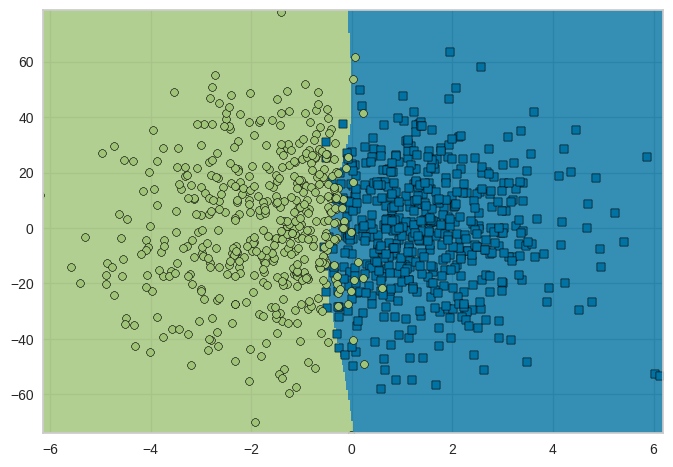

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline을 이용해 전처리 단계와 모델 학습 단계를 연결합니다.
# "std": StandardScaler를 사용해 특성의 스케일을 조정합니다.
# "poly_inputs": PolynomialFeatures를 사용해 입력 특성을 5차 다항 특성으로 변환합니다.
# "lsmv": LinearSVC를 사용해 SVM 모델을 학습합니다. C는 오차 허용 정도를 결정하는 매개변수, loss는 손실 함수를 결정하는 매개변수입니다.

svm_poly = Pipeline([
  ("std", StandardScaler()),
  ("poly_inputs", PolynomialFeatures(degree=5)),
  ("lsmv", LinearSVC(C=0.01, loss="hinge"))
])

# X와 y를 사용해 파이프라인을 학습시킵니다.
svm_poly.fit(X, y)

# DecisionViz 클래스를 사용하여 시각화 도구(viz)를 생성하고, svm_poly 모델과 제목을 인자로 줍니다.
viz = DecisionViz(svm_poly, title="polynomial feature SVM")

# X, y를 사용하여 시각화 도구를 학습시킵니다.
viz.fit(X, y)

# X, y를 사용하여 결정 경계를 그립니다.
viz.draw(X, y)

# MNIST classification



*  0부터 9까지의 숫자를 손으로 쓴 이미지 데이터
*  load_digits() 명령으로 로드한다. 각 이미지는 0부터 15까지의 명암을 가지는 8x8=64픽셀 해상도의 흑백 이미지




In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# sklearn에 내장되어 있는 숫자 이미지 데이터셋(digits)을 불러오세요.
digits = datasets.load_digits()

#n_samples에 digits.images데이터의 총 개수 저장하세요. Hint: len()
n_samples = len(digits.images)

# 이미지 데이터를 1차원 배열로 만드세요.(SVM 등의 알고리즘이 원하는 데이터 형태를 맞추는 과정)
data = digits.images.reshape((n_samples, -1))

# train_test_split을 이용하여 훈련 데이터와 테스트 데이터로 조건에 맞게 나누세요. 레이블(타겟)의 배열은 digits.target
# 조건: test_size=0.5, random_state=42
# Hint: 데이터, 레이블(타겟), 데이터를 나눌 비율, 난수 생성기의 초기값
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42)

In [ ]:
# clf에 svm.SVC(gamma=0.001)를 선언하세요.
clf = svm.SVC(gamma=0.001)

# fit() 함수를 이용해 clf를 학습시키세요.
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행하세요. Hint: clf.predict()
predicted = clf.predict(X_test)

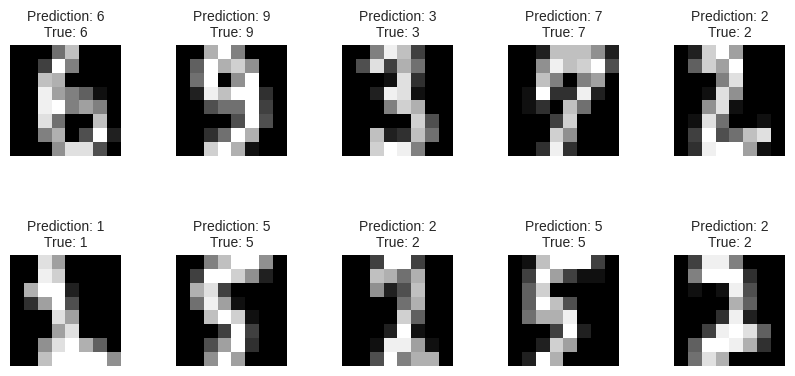

In [ ]:
# 테스트 데이터 중 처음 10개의 예측 레이블과 실제 레이블 비교
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray)
    axes[i].set_title(f"Prediction: {predicted[i]}\nTrue: {y_test[i]}",  fontsize=10)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

Accuracy: 0.9866518353726362


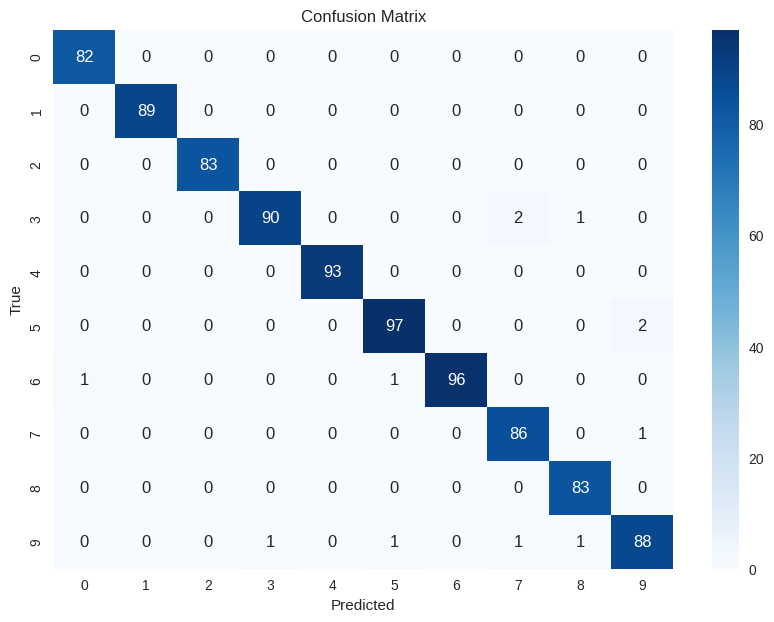

In [ ]:
# accuracy_score()를 사용하여 테스트 데이터의 실제 레이블과 모델이 예측한 레이블을 비교하고 정확도를 계산하여 출력하세요.
print("Accuracy:", accuracy_score(y_test, predicted))

# confusion_matrix())를 사용하여 confusion matrix를 계산하세요.
cm = confusion_matrix(y_test, predicted)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()